In [1]:
from pickle import load

configs, n_params_, runs_ = load(open('results_5.pickle', 'rb'))

In [2]:
configs

[{'channels': 14,
  'depth': 8,
  'dim': 64,
  'dim_head': 64,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 2,
  'image_size': (1, 300),
  'num_classes': 8,
  'optim_strategy': 'Adam:lr=1e-3,wd=0;StepLR:step=50,gamma=.5',
  'patch_size': (1, 20),
  'pool': 'cls',
  'sessions': 5,
  'use_cls_token': True,
  'mlp_dim': 128},
 {'channels': 14,
  'depth': 8,
  'dim': 64,
  'dim_head': 64,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 2,
  'image_size': (1, 300),
  'num_classes': 8,
  'optim_strategy': 'Adam:wd=0;CyclicLR:base_lr=1e-7,max_lr=1e-3,step_size_up=100,step_size_down=None,mode=triangular',
  'patch_size': (1, 20),
  'pool': 'cls',
  'sessions': 5,
  'use_cls_token': True,
  'mlp_dim': 128}]

In [3]:
import pandas as pd

run_warmup = runs_[1][4]
losses_accs_df_w = pd.DataFrame(run_warmup['losses_accs'])

run_fixed = runs_[0][4]
losses_accs_df_f = pd.DataFrame(run_fixed['losses_accs'])

In [4]:
import numpy as np

threshold = .9

vals = []
for i in range(10):
    mask = pd.DataFrame(runs_[1][i]['losses_accs'])['train_acc'] > threshold
    if mask.max() == 0:
        print("Warmup", i, "non ha superato la soglia")
    else:
        vals.append(mask.argmax())
vals = np.array(vals)
print("CyclicLR", vals.mean(), vals.min(), vals.max(), vals.std())

vals = []
for i in range(10):
    mask = pd.DataFrame(runs_[0][i]['losses_accs'])['train_acc'] > threshold
    if mask.max() == 0:
        print("Fixed", i, "non ha superato la soglia")
    else:
        vals.append(mask.argmax())

vals = np.array(vals)
print("Fixed", vals.mean(), vals.min(), vals.max(), vals.std())

CyclicLR 31.8 29 34 1.4000000000000001
Fixed 1 non ha superato la soglia
Fixed 51.333333333333336 40 81 12.445436468396311


In [33]:
import numpy as np

threshold = .65

vals = []
for i in range(10):
    mask = pd.DataFrame(runs_[1][i]['losses_accs'])['val_acc'] > threshold
    if mask.max() == 0:
        print("Warmup", i, "non ha superato la soglia")
    else:
        vals.append(mask.argmax())
vals = np.array(vals)
print("CyclicLR", vals.mean(), vals.min(), vals.max(), vals.std())
print("CyclicLR", vals.mean(), .5 * (vals.max() - vals.min()) )

vals = []
for i in range(10):
    mask = pd.DataFrame(runs_[0][i]['losses_accs'])['val_acc'] > threshold
    if mask.max() == 0:
        print("Fixed", i, "non ha superato la soglia")
    else:
        vals.append(mask.argmax())

vals = np.array(vals)
print("Fixed", vals.mean(), vals.min(), vals.max(), vals.std())
print("Fixed", vals.mean(), .5 * (vals.max() - vals.min()) )

CyclicLR 14.3 11 17 2.2825424421026654
CyclicLR 14.3 3.0
Fixed 1 non ha superato la soglia
Fixed 19.333333333333332 12 27 5.617433182117573
Fixed 19.333333333333332 7.5


In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, ncols=2)

print("Soggetto: 2")
#print(model_config)
#print("parametri:", f"{n_params / 1e3:.2f}k")

ax = axes[0, :]
ax[0].plot(losses_accs_df_w['train_acc'], label='train_acc')
ax[0].plot(losses_accs_df_w['val_acc'], label='val_acc')
ax[0].plot(losses_accs_df_w['test_acc'], label='test_acc')
ax[0].grid(True)
ax[0].legend()
ax[0].set_title('Warmup')

ax[1].plot(losses_accs_df_f['train_acc'], label='train_acc')
ax[1].plot(losses_accs_df_f['val_acc'], label='val_acc')
ax[1].plot(losses_accs_df_f['test_acc'], label='test_acc')
ax[1].grid(True)
ax[1].legend()
ax[1].set_title('Fisso 1e-3 dimezzato ogni 50')
ax[0].set_ylim([.4, 1])
ax[1].set_ylim([.4, 1])

ax = axes[1, :]
ax[0].plot(losses_accs_df_w['train_loss'], label='train_loss')
ax[0].plot(losses_accs_df_w['val_loss'], label='val_loss')
ax[0].plot(losses_accs_df_w['test_loss'], label='test_loss')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(losses_accs_df_f['train_loss'], label='train_loss')
ax[1].plot(losses_accs_df_f['val_loss'], label='val_loss')
ax[1].plot(losses_accs_df_f['test_loss'], label='test_loss')
ax[1].grid(True)
ax[1].legend()
ax[0].set_ylim([0, 2.75])
ax[1].set_ylim([0, 2.75])

None

plt.show()

Soggetto: 2


<Figure size 1600x800 with 4 Axes>

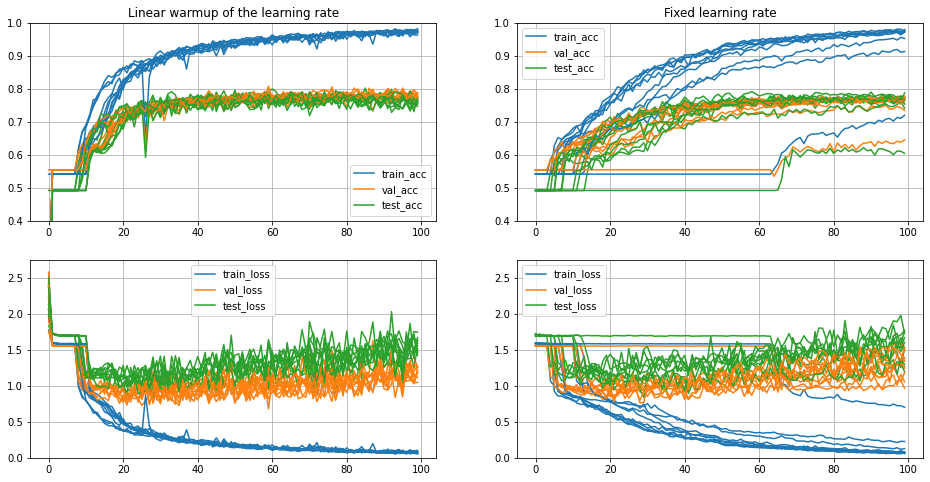

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(16, 8), nrows=2, ncols=2)

#print("Soggetto: 2")
#print(model_config)
#print("parametri:", f"{n_params / 1e3:.2f}k")

for i in range(10):
    
    run_warmup = runs_[1][i]
    losses_accs_df_w = pd.DataFrame(run_warmup['losses_accs'])

    run_fixed = runs_[0][i]
    losses_accs_df_f = pd.DataFrame(run_fixed['losses_accs'])


    ax = axes[0, :]
    ax[0].plot(losses_accs_df_w['train_acc'], label='train_acc', c='C0')
    ax[0].plot(losses_accs_df_w['val_acc'], label='val_acc', c='C1')
    ax[0].plot(losses_accs_df_w['test_acc'], label='test_acc', c='C2')
    ax[0].grid(True)
    #ax[0].legend()
    ax[0].set_title('Linear warmup of the learning rate')

    ax[1].plot(losses_accs_df_f['train_acc'], label='train_acc', c='C0')
    ax[1].plot(losses_accs_df_f['val_acc'], label='val_acc', c='C1')
    ax[1].plot(losses_accs_df_f['test_acc'], label='test_acc', c='C2')
    ax[1].grid(True)
    #ax[1].legend()
    ax[1].set_title('Fixed learning rate',)
    ax[0].set_ylim([.4, 1])
    ax[1].set_ylim([.4, 1])

    ax = axes[1, :]
    ax[0].plot(losses_accs_df_w['train_loss'], label='train_loss', c='C0')
    ax[0].plot(losses_accs_df_w['val_loss'], label='val_loss', c='C1')
    ax[0].plot(losses_accs_df_w['test_loss'], label='test_loss', c='C2')
    ax[0].grid(True)
    #ax[0].legend()

    ax[1].plot(losses_accs_df_f['train_loss'], label='train_loss', c='C0')
    ax[1].plot(losses_accs_df_f['val_loss'], label='val_loss', c='C1')
    ax[1].plot(losses_accs_df_f['test_loss'], label='test_loss', c='C2')
    ax[1].grid(True)
    #ax[1].legend()
    ax[0].set_ylim([0, 2.75])
    ax[1].set_ylim([0, 2.75])

    None
    
axes[0, 0].legend(['train_acc', 'val_acc', 'test_acc'])
axes[0, 1].legend(['train_acc', 'val_acc', 'test_acc'])
axes[1, 0].legend(['train_loss', 'val_loss', 'test_loss'])
axes[1, 1].legend(['train_loss', 'val_loss', 'test_loss'])

plt.show()

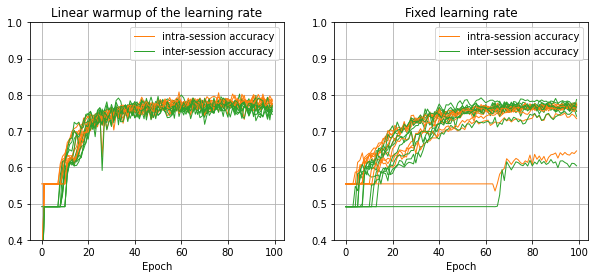

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

#print("Soggetto: 2")
#print(model_config)
#print("parametri:", f"{n_params / 1e3:.2f}k")

for i in range(10):
    
    run_warmup = runs_[1][i]
    losses_accs_df_w = pd.DataFrame(run_warmup['losses_accs'])

    run_fixed = runs_[0][i]
    losses_accs_df_f = pd.DataFrame(run_fixed['losses_accs'])


    ax = axes
    #ax[0].plot(losses_accs_df_w['train_acc'], label='train_acc', c='C0')
    ax[0].plot(losses_accs_df_w['val_acc'], label='intra-session accuracy', c='C1', linewidth=1)
    ax[0].plot(losses_accs_df_w['test_acc'], label='inter-session accuracy', c='C2', linewidth=1)
    ax[0].grid(True)
    #ax[0].legend()
    ax[0].set_title('Linear warmup of the learning rate')

    #ax[1].plot(losses_accs_df_f['train_acc'], label='train_acc', c='C0')
    ax[1].plot(losses_accs_df_f['val_acc'], label='val_acc', c='C1', linewidth=1)
    ax[1].plot(losses_accs_df_f['test_acc'], label='test_acc', c='C2', linewidth=1)
    ax[1].grid(True)
    #ax[1].legend()
    ax[1].set_title('Fixed learning rate',)
    ax[0].set_ylim([.4, 1])
    ax[1].set_ylim([.4, 1])

    None
    
#axes[0, 0].legend(['train_acc', 'val_acc', 'test_acc'])
#axes[0, 1].legend(['train_acc', 'val_acc', 'test_acc'])
#axes[0].legend(['train_loss', 'val_loss', 'test_loss'])
#axes[1, 1].legend(['train_loss', 'val_loss', 'test_loss'])

axes[0].legend(['intra-session accuracy', 'inter-session accuracy'])
axes[1].legend(['intra-session accuracy', 'inter-session accuracy'])

axes[0].set_xlabel("Epoch")
axes[1].set_xlabel("Epoch")

plt.show()